In this notebook I will have 4 fundamentals machine learning algorithms

- Linear regresion
- Classification
- Clustering
- Hidden Markov Models

Database from https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [5]:
!pip install -q sklearn

In [6]:
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc



In [64]:
dftrain= pd.read_csv('datas/train.csv')
dfeval= pd.read_csv('datas/test.csv')
print(dftrain.head())



   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500     0         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250     0         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500     0         S

[5 rows x 12 columns]


In [71]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [72]:
dftrain1=dftrain.drop(dftrain.columns[8],axis=1)
dftrain2=dftrain1.drop(dftrain.columns[10],axis=1)
dftrain3 = dftrain2.drop(dftrain.columns[11], axis=1)
dftrain3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [87]:
dftrain3.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [73]:
dfeval1 = dfeval.drop(dftrain.columns[8], axis=1)
dfeval2 = dfeval1.drop(dftrain.columns[10], axis=1)
dfeval3 = dfeval2.drop(dftrain.columns[11], axis=1)
dfeval3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875


In [88]:
dfeval3.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [74]:
y_train=dftrain3.pop('Survived')
y_eval=dfeval3.pop('Survived')

<AxesSubplot:>

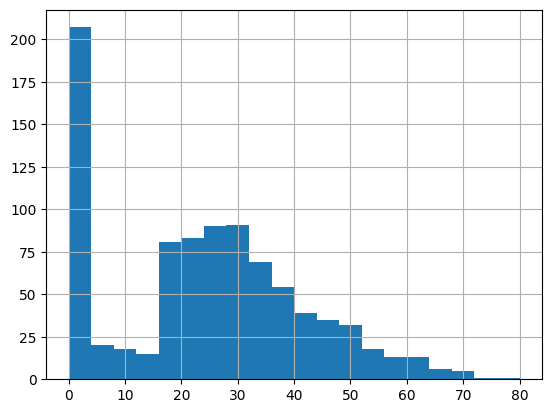

In [69]:
dftrain3.Age.hist(bins=20)


<AxesSubplot:>

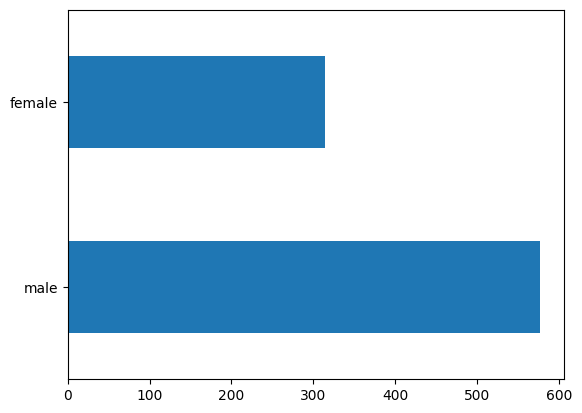

In [18]:
dftrain3.Sex.value_counts().plot(kind='barh')

<AxesSubplot:>

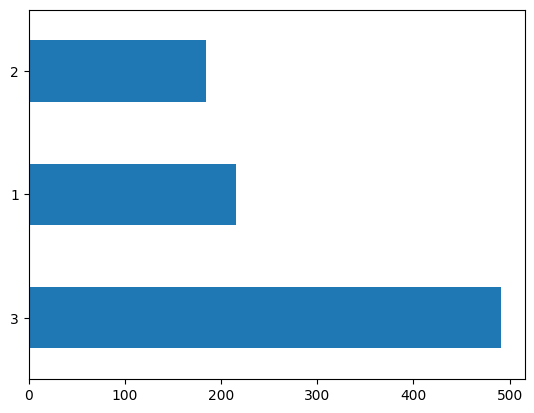

In [21]:
dftrain3['Pclass'].value_counts().plot(kind='barh')

Training data and Eval data

In [83]:
categorical_columns=['Sex','SibSp','Parch','Pclass']
Numeric_Columns=['Age','Fare']

feature_columns=[]
for feature_name in categorical_columns:
    vocabulary=dftrain3[feature_name].unique()
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

for feature_name in Numeric_Columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
print(feature_columns) 


[NumericColumn(key='Sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [84]:
def make_input_fn(data_df,label_df,num_epoch=10,shuffle=True,batch_size=32):
    def input_function():
        ds =tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds= ds.shuffle(1000)
        ds =ds.batch(batch_size).repeat(num_epoch)
        return ds
    return input_function

train_input_fn= make_input_fn(dftrain3, y_train)
eval_input_fn=make_input_fn(dfeval3,y_eval,num_epoch=1,shuffle=False)







In [85]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpotuw2f1o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [86]:
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)

clear_output()
print(result['accuracy'])

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2023-01-22 15:17:05.460526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-22 15:17:05.469177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpotuw2f1o/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


2023-01-22 15:17:06.095993: W tensorflow/core/framework/op_kernel.cc:1757] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'linear/linear_model/linear/linear_model/linear/linear_model/Sex/Cast' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/luismi/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/luismi/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_15951/1236533175.py", line 1, in <module>
      linear_est.train(train_input_fn)
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 360, in train
      loss = self._train_model(input_fn, hooks, saving_listeners)
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1186, in _train_model
      return self._train_model_default(input_fn, hooks, saving_listeners)
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1214, in _train_model_default
      estimator_spec = self._call_model_fn(features, labels, ModeKeys.TRAIN,
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1174, in _call_model_fn
      model_fn_results = self._model_fn(features=features, **kwargs)
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 934, in _model_fn
      return _linear_model_fn_v2(
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 662, in _linear_model_fn_v2
      logits, trainable_variables = _linear_model_fn_builder_v2(
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 599, in _linear_model_fn_builder_v2
      logits = linear_model(features)
    File "/home/luismi/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/luismi/.local/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/luismi/.local/lib/python3.10/site-packages/keras/engine/base_layer_v1.py", line 838, in __call__
      outputs = call_fn(cast_inputs, *args, **kwargs)
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1668, in call
      return self.layer(features)
    File "/home/luismi/.local/lib/python3.10/site-packages/keras/engine/base_layer_v1.py", line 838, in __call__
      outputs = call_fn(cast_inputs, *args, **kwargs)
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1489, in call
      for column in self._feature_columns:
    File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1496, in call
      weighted_sum = fc_v2._create_weighted_sum(  # pylint: disable=protected-access
Node: 'linear/linear_model/linear/linear_model/linear/linear_model/Sex/Cast'
Cast string to float is not supported
	 [[{{node linear/linear_model/linear/linear_model/linear/linear_model/Sex/Cast}}]]

Original stack trace for 'linear/linear_model/linear/linear_model/linear/linear_model/Sex/Cast':
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/luismi/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
    app.start()
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/home/luismi/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
    self._run_once()
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
    await self.process_one()
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
    await dispatch(*args)
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
    await result
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
    reply_content = await reply_content
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
    res = shell.run_cell(
  File "/home/luismi/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
    result = self._run_cell(
  File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
    return runner(coro)
  File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/home/luismi/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_15951/1236533175.py", line 1, in <module>
    linear_est.train(train_input_fn)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 360, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1186, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1214, in _train_model_default
    estimator_spec = self._call_model_fn(features, labels, ModeKeys.TRAIN,
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/estimator.py", line 1174, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 934, in _model_fn
    return _linear_model_fn_v2(
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 662, in _linear_model_fn_v2
    logits, trainable_variables = _linear_model_fn_builder_v2(
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 599, in _linear_model_fn_builder_v2
    logits = linear_model(features)
  File "/home/luismi/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
    return super().__call__(*args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/keras/engine/base_layer_v1.py", line 838, in __call__
    outputs = call_fn(cast_inputs, *args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1668, in call
    return self.layer(features)
  File "/home/luismi/.local/lib/python3.10/site-packages/keras/engine/base_layer_v1.py", line 838, in __call__
    outputs = call_fn(cast_inputs, *args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1489, in call
    for column in self._feature_columns:
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/autograph/operators/control_flow.py", line 463, in for_stmt
    _py_for_stmt(iter_, extra_test, body, None, None)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/autograph/operators/control_flow.py", line 512, in _py_for_stmt
    body(target)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/autograph/operators/control_flow.py", line 478, in protected_body
    original_body(protected_iter)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1496, in call
    weighted_sum = fc_v2._create_weighted_sum(  # pylint: disable=protected-access
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/feature_column/feature_column_v2.py", line 2238, in _create_weighted_sum
    return _create_dense_column_weighted_sum(
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/feature_column/feature_column_v2.py", line 2248, in _create_dense_column_weighted_sum
    tensor = column.get_dense_tensor(transformation_cache, state_manager)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/feature_column/feature_column_v2.py", line 2693, in get_dense_tensor
    return transformation_cache.get(self, state_manager)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/feature_column/feature_column_v2.py", line 2456, in get
    transformed = column.transform_feature(self, state_manager)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/feature_column/feature_column_v2.py", line 2666, in transform_feature
    return self._transform_input_tensor(input_tensor)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/feature_column/feature_column_v2.py", line 2641, in _transform_input_tensor
    return math_ops.cast(input_tensor, dtypes.float32)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py", line 1176, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/ops/math_ops.py", line 1003, in cast
    x = gen_math_ops.cast(x, base_type, name=name)
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2014, in cast
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/framework/op_def_library.py", line 797, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/home/luismi/.local/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 3800, in _create_op_internal
    ret = Operation(
